# Twitter Hatespeech Classifier
### Using dataset "hate.csv" provided
##### MGPO 695 group project

In [41]:
#Import Packages

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

## Data Exploration
Our dataset comprises of two columns, "tweet" which is a string of text that represents a real tweet that was posted on Twitter.com. The "class" column is a binary 0 or 1, 0:the tweet does not contain hate speech, 1: the tweet does contain hate speech.

In [31]:
df = pd.read_csv("hate.csv")
df = df.iloc[:, 5:]
df.loc[df['class'] == 2, 'class'] = 1


df[df['class']==0].head()

,class,tweet
27025,0,@user when a father is dysfunctional and is s...
27026,0,@user @user thanks for #lyft credit i can't us...
27027,0,bihday your majesty
27028,0,#model i love u take with u all the time in ...
27029,0,factsguide: society now #motivation


In [34]:
df[df['class']==1].head()

,class,tweet
0,1,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [35]:
df.describe()

,class
count,56745.000000
mean,0.476253
std,0.499440
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


##### Analsyis
Above we observe that out of roughly 56 thousand tweets 47% of our data are hateful tweets.

# Use Case 1:
##### Twitter is losing money and advertisers due to an increase in hate speech

In [40]:
X_train, X_test, y_train, y_test = train_test_split(df['tweet'], df['class'], test_size=0.2, random_state=42)

#TF-IDF vectorizer to transform the text data into numerical features
vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

#Linear SVM classifier
clf = LinearSVC()
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9693365054189796
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      5963
           1       0.98      0.96      0.97      5386

    accuracy                           0.97     11349
   macro avg       0.97      0.97      0.97     11349
weighted avg       0.97      0.97      0.97     11349



/Users/bennettfahey/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


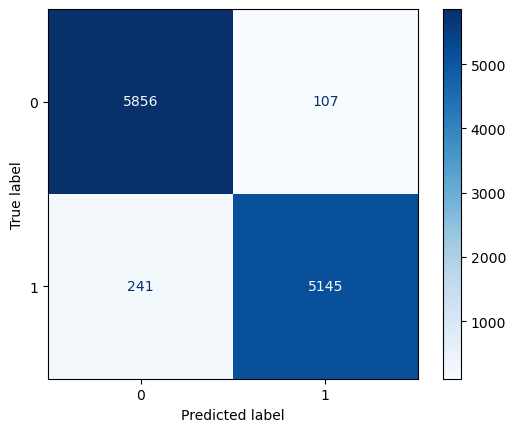

In [42]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

#### Analysis
Our model performed well with 96.9% accuracy, above it can be seen(bottom left) that less than 4% of tweets that contained hate speech were classified as normal, this is considered a false negative and more harmful than a false positive. Still the model performed exceptionally well.

# Use Case 2:
##### Find sentiment for Twitter users, increasing user satisfaction and retention

In [46]:
df2 = pd.read_csv("Tweet Sentiments.csv")
df2.describe()

,Sentiment,Cleaned Tweets
count,37491,37491
unique,4,18876
top,anxious,human need job cant exist amp make art chill cat
freq,10509,446


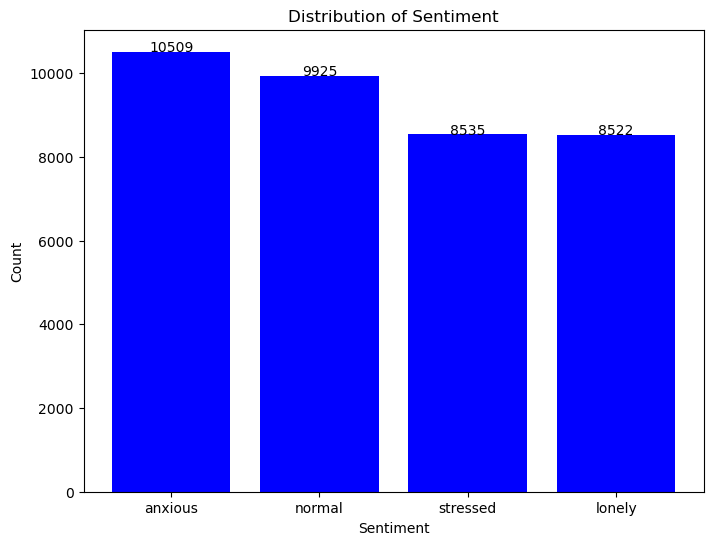

In [48]:
sentiment_counts = df2['Sentiment'].value_counts()

plt.figure(figsize=(8,6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color='blue')

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment')

for i, v in enumerate(sentiment_counts.values):
    plt.text(i, v+10, str(v), ha='center')

plt.show()

## NLP Classifier creation

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

xtrain, xtest, ytrain, ytest = train_test_split(df2["Cleaned Tweets"], df2["Sentiment"], test_size=0.3, random_state=0)

# Vectorizer uses bag of words technology
vectorizer = CountVectorizer()
xtrain_bow = vectorizer.fit_transform(xtrain)
xtest_bow = vectorizer.transform(xtest)


sentiment_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
sentiment_classifier.fit(xtrain_bow, ytrain)

predictions = sentiment_classifier.predict(xtest_bow)

print(confusion_matrix(ytest, predictions))
print(classification_report(ytest, predictions))
print(accuracy_score(ytest, predictions))

[[1225 1739  132   21]
 [1998  569   31   16]
 [  52   31 2820   38]
 [  24   21  125 2406]]
              precision    recall  f1-score   support

     anxious       0.37      0.39      0.38      3117
      lonely       0.24      0.22      0.23      2614
      normal       0.91      0.96      0.93      2941
    stressed       0.97      0.93      0.95      2576

    accuracy                           0.62     11248
   macro avg       0.62      0.63      0.62     11248
weighted avg       0.62      0.62      0.62     11248

0.6241109530583214


#### Analysis
Our model performed well with 62.4% accuracy, we observe that the model was excellent at classifying normal and stressed tweets while it had more trouble with anxious and lonely tweets. This model will help identify a high quality measure of not only customer satisfaction, but customer sentiment as a whole.